In [1]:
# SETUP

import matplotlib.pyplot as plt
import numpy as np
import glob
import re

plt.rcParams.update({'font.size': 12}) # Set font size globally


In [2]:
# Helper: Extract temperature as integer from filename

def file_get_temp(filename):
    match = re.search(r'(\d+)', filename)
    return int(match.group(1)) if match else None

In [3]:
# Helper: Get files sorted by extracted temperature

def file_sort_by_temp(pattern):
    files = sorted(glob.glob(pattern), key=file_get_temp)
    return {file_get_temp(f): f for f in files if file_get_temp(f) is not None}

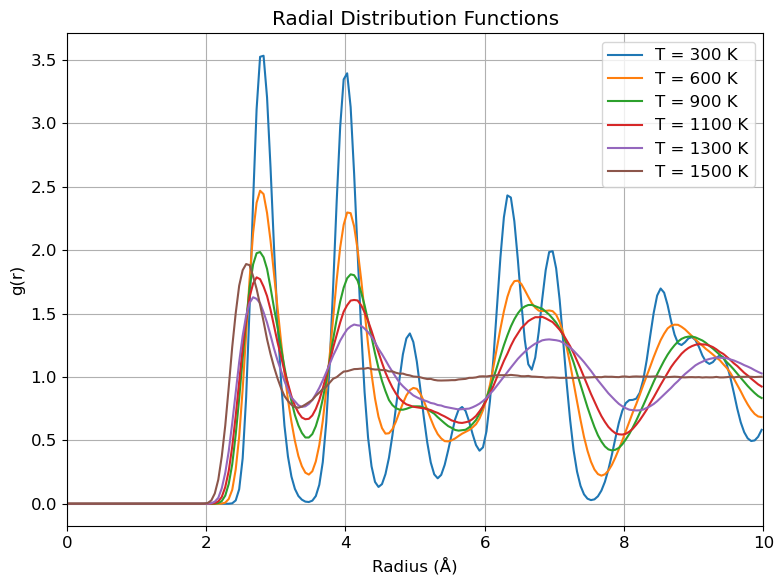

Saved first peak positions.


In [5]:
# RDF plotting function

def plot_rdfs_sorted():
    rdf_files = file_sort_by_temp("rdf*.txt")  # dict {temp: file}

    plt.figure(figsize=(8, 6))
    peaks = []  # Store (temp, peak_radius)

    for temp, file in rdf_files.items():
        with open(file, 'r') as f:
            lines = f.readlines()

        # Find where header ends and data starts
        data_start_index = 0
        for i, line in enumerate(lines):
            if line.startswith("#"):
                continue
            else:
                data_start_index = i + 1  # skip one more line
                break

        try:
            data = np.genfromtxt(lines[data_start_index:], delimiter=None)
        except ValueError:
            print(f"Skipping malformed file: {file}")
            continue

        if data.ndim != 2 or data.shape[1] < 4:
            print(f"Skipping incomplete RDF data in: {file}")
            continue

        radius = data[:, 1]
        g_r = data[:, 2]

        # Find index of first peak (maximum g(r))
        peak_index = np.argmax(g_r)
        peak_radius = radius[peak_index]
        peaks.append((temp, peak_radius))

        plt.plot(radius, g_r, label=f"T = {temp} K")

    plt.xlabel("Radius (Å)")
    plt.ylabel("g(r)")
    plt.title("Radial Distribution Functions")
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 10)
    plt.tight_layout()
    plt.savefig("RDFs.png", dpi=600)
    plt.show()

    # Convert to NumPy array and save with np.savetxt
    peak_array = np.array(sorted(peaks), dtype=float)  # Ensure proper numerical sort
    np.savetxt("see_RDF_first_peaks.txt", peak_array, fmt="%.6f")

    print(f"Saved first peak positions.")
    
# Run it
plot_rdfs_sorted()